In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
data = {
    'Player': [
        'Joe Root', 'Ben Stokes', 'Jofra Archer', 'Jos Buttler', 'Chris Woakes',
        'Moeen Ali', 'James Anderson', 'Stuart Broad', 'Jonny Bairstow', 'Sam Curran',
        'Dawid Malan', 'Ollie Robinson', 'Mark Wood', 'Liam Livingstone', 'Adil Rashid'
    ],
    'Runs': [11000, 6000, 500, 4500, 3000, 3000, 650, 800, 5500, 1500, 2000, 300, 400, 1000, 1000],
    'Wickets': [50, 150, 90, 10, 150, 200, 680, 600, 5, 100, 2, 75, 120, 15, 250]
}

df = pd.DataFrame(data)
df


,Player,Runs,Wickets
0,Joe Root,11000,50
1,Ben Stokes,6000,150
2,Jofra Archer,500,90
3,Jos Buttler,4500,10
4,Chris Woakes,3000,150
5,Moeen Ali,3000,200
6,James Anderson,650,680
7,Stuart Broad,800,600
8,Jonny Bairstow,5500,5
9,Sam Curran,1500,100


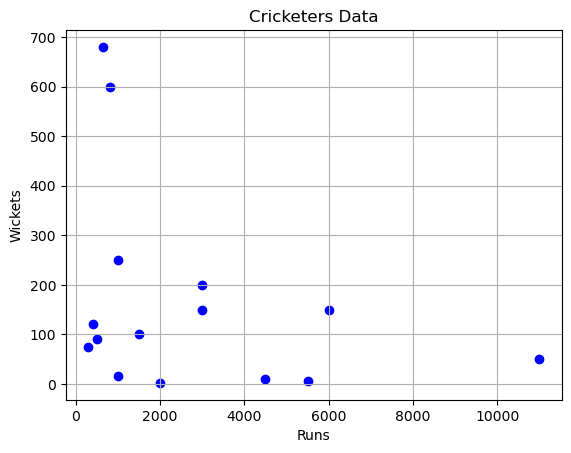

In [3]:
plt.scatter(df['Runs'], df['Wickets'], color='blue')
plt.xlabel('Runs')
plt.ylabel('Wickets')
plt.title('Cricketers Data')
plt.grid(True)
plt.show()


In [4]:
X = df[['Runs', 'Wickets']]

In [5]:
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(X)
df

,Player,Runs,Wickets,Cluster
0,Joe Root,11000,50,1
1,Ben Stokes,6000,150,0
2,Jofra Archer,500,90,2
3,Jos Buttler,4500,10,0
4,Chris Woakes,3000,150,0
5,Moeen Ali,3000,200,0
6,James Anderson,650,680,2
7,Stuart Broad,800,600,2
8,Jonny Bairstow,5500,5,0
9,Sam Curran,1500,100,2


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Runs', 'Wickets']])


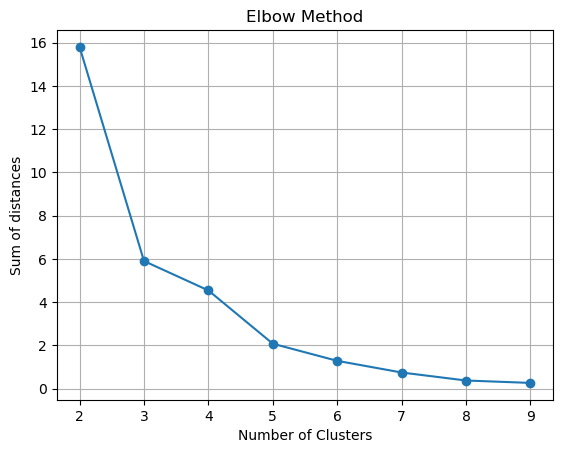

In [9]:
wcss = []
for cluster in range(2, 10):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

K = range(2, 10)
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of distances')
plt.title('Elbow Method')
plt.grid(True)
plt.show()